## Логистическая регрессия

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Реализуйте обучение логистической регрессии с $L^1$ и $L^2$ регуляризацией с помощью метода Stochastic Gradient Descent (SGD)

#### Замечания
* В SGD градиент расчитывается по одному случайному объекту
* Для отладки работы алгоритма, реализуйте возможность сохранения или вывода ошибки модели после очередной итерации
* Правило останова - максимальное количество эпох
    
Эпохой в SGD и MB-SGD называется один проход по **всем** объектам в выборке (тем или иным способом)

# Реализация модели

In [2]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    """
    Предполагается, что в выборке всегда 2 класса
    """
    def __init__(self, C=1, alpha=0.01, max_epoch=10, penalty='l2'):
        """
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        penalty - способ регуляризации: '0', 'l1', 'l2'
        """
        self.C = C
        self.alpha = alpha
        self.penalty = penalty
        self.max_epoch = max_epoch
    
    def fit(self, X, y=None):
        '''
        Обучение модели
        '''
        X_ = np.concatenate((np.ones(shape=(X.shape[0],1)),X),axis=1) #adding column of ones
        theta=np.random.randn(X_.shape[1],1) # random initialization
        cost=[]
        m = X.shape[0]
        
        if self.penalty=='0':
            reg=np.zeros(shape=theta.shape)
            reg_Q=0
        elif self.penalty=='l1':
            reg=(1./self.C)*np.sign(theta)/m
            reg_Q=(1./self.C)*np.sum(theta)/m
        elif self.penalty=='l2':
            reg=(2./self.C)*theta/m
            reg_Q=(1./self.C)*np.sum(np.square(theta))/m
            
        for epoch in range(self.max_epoch):
            p = np.random.permutation(range(m))
            for idx in p:
                xi = X_[[idx],:]
                yi = y[idx]
                pi_hat=1/(1+np.exp(-np.dot(xi,theta)))
                dtheta=np.dot(xi.reshape(X_.shape[1],1),(pi_hat-yi)) + reg
                theta=theta - self.alpha*dtheta
            
            p_hat = 1/(1+np.exp(-np.dot(X_,theta)))
            error_epoch = -(y*np.log(p_hat)+(1-y)*np.log(1-p_hat)).mean() + reg_Q 
            cost.append(error_epoch)
        return theta,cost

    def predict(self, X, theta):
        '''
        Возвращение метки класса
        '''
        X_ = np.concatenate((np.ones(shape=(X.shape[0],1)),X),axis=1) #adding column of ones
        p_hat=1/(1+np.exp(-np.dot(X_,theta)))
        y_hat=[1 if i>=.5 else 0 for i in p_hat]
        return y_hat
    
    def predict_proba(self, X, theta):
        '''
        Возвращение вероятности каждого из классов
        '''
        X_ = np.concatenate((np.ones(shape=(X.shape[0],1)),X),axis=1) #adding column of ones
        p_hat = 1/(1+np.exp(-np.dot(X_,theta)))
        return p_hat

## Проверка на синтетических данных (2 балл)

Запустите ваш алгоритм на синтетических данных. 
Выведите полученные веса и нарисуйте разделяющую границу между классами.

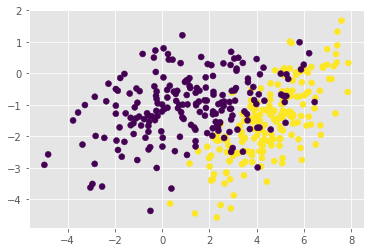

In [3]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

Без регуляризации
[[-2.42561085]
 [ 0.67214447]
 [-0.51943861]]


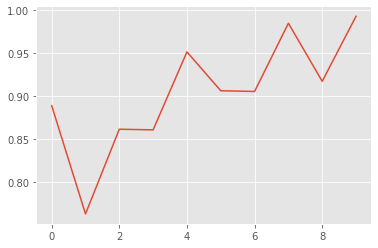

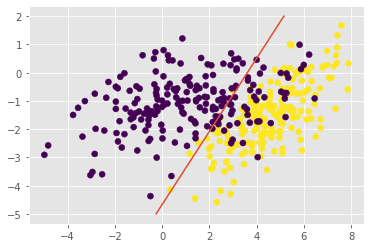

Prediction probability [0.92 0.96 0.84 0.85 0.84 0.91 0.86 0.86 0.87 0.74 0.68 0.79 0.82 0.79
 0.95 0.85 0.47 0.8  0.93 0.75 0.54 0.87 0.72 0.8  0.65 0.78 0.63 0.84
 0.84 0.72 0.72 0.52 0.78 0.74 0.75 0.86 0.76 0.77 0.67 0.79 0.81 0.67
 0.96 0.86 0.83 0.88 0.89 0.88 0.92 0.85 0.8  0.81 0.89 0.69 0.96 0.94
 0.9  0.86 0.85 0.9  0.72 0.91 0.74 0.91 0.88 0.81 0.76 0.83 0.82 0.72
 0.74 0.87 0.95 0.85 0.65 0.92 0.65 0.73 0.78 0.67 0.91 0.87 0.81 0.52
 0.89 0.88 0.8  0.8  0.67 0.78 0.61 0.46 0.68 0.73 0.88 0.74 0.67 0.82
 0.9  0.96 0.76 0.91 0.68 0.73 0.82 0.88 0.81 0.69 0.84 0.91 0.7  0.82
 0.7  0.84 0.74 0.63 0.81 0.8  0.7  0.88 0.72 0.77 0.58 0.93 0.56 0.79
 0.79 0.89 0.58 0.76 0.65 0.76 0.68 0.85 0.8  0.49 0.92 0.72 0.83 0.86
 0.88 0.89 0.87 0.85 0.92 0.71 0.85 0.89 0.86 0.82 0.87 0.73 0.81 0.52
 0.84 0.88 0.63 0.79 0.78 0.79 0.66 0.73 0.68 0.94 0.85 0.74 0.74 0.66
 0.72 0.89 0.83 0.6  0.75 0.8  0.87 0.56 0.83 0.7  0.59 0.83 0.85 0.88
 0.82 0.75 0.66 0.72 0.84 0.85 0.68 0.87 0.72 0.47 0.6

In [4]:
print('Без регуляризации')
model=MySGDClassifier(C=1, alpha=0.01, max_epoch=10, penalty='0')
theta_,error_=model.fit(X, y)
print(theta_)
plt.plot(range(10),error_)
plt.show()
plt.scatter(X[:,0], X[:,1], c=y)
y_lin=range(-5,3)
x_lin=(1/theta_[1])*(-theta_[0]-y_lin*theta_[2]) 
plt.plot(x_lin,y_lin)
plt.show()
p_hat=model.predict_proba(X, theta_)
y_hat=model.predict(X,theta_)
print('Prediction probability',np.concatenate(np.round(p_hat,2)).ravel())
print('Predicted class',y_hat)

l1-регуляризация
[[-2.67052346]
 [ 0.68154369]
 [-0.60570226]]


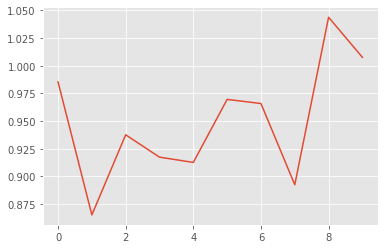

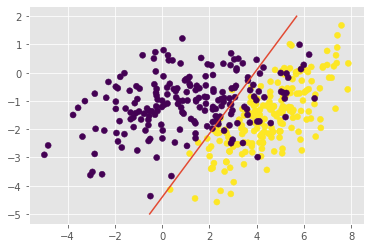

In [6]:
print('l1-регуляризация')
model=MySGDClassifier(C=1, alpha=0.01, max_epoch=10, penalty='l1')
theta_,error_=model.fit(X, y)
print(theta_)
plt.plot(range(10),error_)
plt.show()
plt.scatter(X[:,0], X[:,1], c=y)
y_lin=range(-5,3)
x_lin=(1/theta_[1])*(-theta_[0]-y_lin*theta_[2]) 
plt.plot(x_lin,y_lin)
plt.show()

l2-регуляризация
[[-3.18122223]
 [ 0.78460998]
 [-0.70048081]]


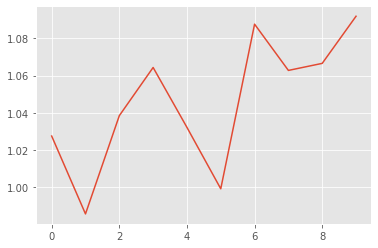

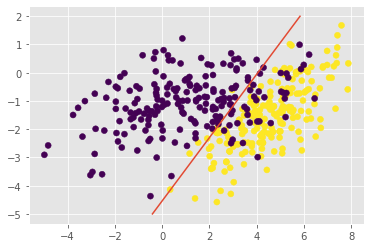

In [7]:
print('l2-регуляризация')
model=MySGDClassifier(C=1, alpha=0.01, max_epoch=10, penalty='l2')
theta_,error_=model.fit(X, y)
print(theta_)
plt.plot(range(10),error_)
plt.show()
plt.scatter(X[:,0], X[:,1], c=y)
y_lin=range(-5,3)
x_lin=(1/theta_[1])*(-theta_[0]-y_lin*theta_[2]) 
plt.plot(x_lin,y_lin)
plt.show()

## Анализ сходимости

Покажите сходимость вашего метода: изобразите графики зависимости значения функции потерь (по всей выборке) после очередной итерации/эпохи (выбрать одно) для разных `alpha`.

Без регуляризации


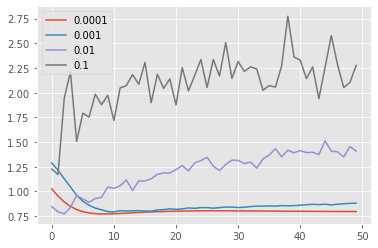

In [37]:
print('Без регуляризации')
fig, ax = plt.subplots()
for count,i in enumerate([0.0001,0.001,0.01,0.1]):
    thetai_,errori_= MySGDClassifier(C=1, alpha=i, max_epoch=50, penalty='0').fit(X, y)
    ax.plot(np.arange(50),errori_,label=i)
leg = ax.legend()

l1-регуляризация


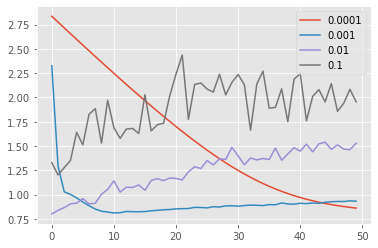

In [38]:
print('l1-регуляризация')
fig, ax = plt.subplots()
for count,i in enumerate([0.0001,0.001,0.01,0.1]):
    thetai_,errori_= MySGDClassifier(C=1, alpha=i, max_epoch=50, penalty='l1').fit(X, y)
    ax.plot(np.arange(50),errori_,label=i)
leg = ax.legend()

l2-регуляризация


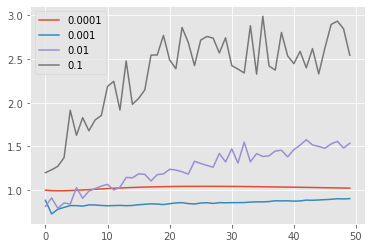

In [39]:
print('l2-регуляризация')
fig, ax = plt.subplots()
for count,i in enumerate([0.0001,0.001,0.01,0.1]):
    thetai_,errori_= MySGDClassifier(C=1, alpha=i, max_epoch=50, penalty='l2').fit(X, y)
    ax.plot(np.arange(50),errori_,label=i)
leg = ax.legend()